In [29]:
import os,sys

In [30]:
# Get the absolute path of the parent directory
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [31]:
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# import script for preprocessing
from scripts.utils import *

In [32]:
# Instantiate the DataAnalyzer class
data_extracter = DataAnalyizer()

In [33]:
# featch world gdp
data_extracter.fetch_world_data()

Fetching world data...
Fetch complete. Data type: <class 'wbdata.client.DataFrame'>
World data fetched and filtered by date successfully.
        date  GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
0 2023-01-01        2.719333            5.691153               4.961431   
1 2022-01-01        3.089607            7.967574               5.264616   
2 2021-01-01        6.259851            3.466926               6.033761   
3 2020-01-01       -2.932043            1.920968               6.585288   
4 2019-01-01        2.642216            2.206073               5.582980   

  Exchange Rate (USD)  
0                None  
1                None  
2                None  
3                None  
4                None  
Data saved to 'world_data.csv'.


In [34]:
data_extracter.resample_to_daily()

World data resampled to daily frequency.
            GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
date                                                                    
1987-01-01        3.724627            5.710119                    NaN   
1987-01-02        3.724627            5.710119                    NaN   
1987-01-03        3.724627            5.710119                    NaN   
1987-01-04        3.724627            5.710119                    NaN   
1987-01-05        3.724627            5.710119                    NaN   

           Exchange Rate (USD)  
date                            
1987-01-01                None  
1987-01-02                None  
1987-01-03                None  
1987-01-04                None  
1987-01-05                None  


load the data

In [35]:
file_path ='../data/BrentOilPrices.csv'
data_extracter.load_oil_prices_from_csv(file_path=file_path)

c:\Users\Firew Ayele\Desktop\kifiya\Birhan_Energies\scripts\utils.py:76: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.oil_prices = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')


Oil prices loaded successfully.
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


In [36]:
data_extracter.merge_data()

Data merged successfully, maintaining only dates from oil prices data.
            GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
Date                                                                    
1987-05-20        3.724627            5.710119                    NaN   
1987-05-21        3.724627            5.710119                    NaN   
1987-05-22        3.724627            5.710119                    NaN   
1987-05-25        3.724627            5.710119                    NaN   
1987-05-26        3.724627            5.710119                    NaN   

           Exchange Rate (USD)  Price  
Date                                   
1987-05-20                None  18.63  
1987-05-21                None  18.45  
1987-05-22                None  18.55  
1987-05-25                None  18.60  
1987-05-26                None  18.63  
Merged data saved to 'merged_data.csv'.


In [37]:
merged_data =pd.read_csv('merged_data.csv')
merged_data.head()

,Date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (USD),Price
0,1987-05-20,3.724627,5.710119,NaN,NaN,18.63
1,1987-05-21,3.724627,5.710119,NaN,NaN,18.45
2,1987-05-22,3.724627,5.710119,NaN,NaN,18.55
3,1987-05-25,3.724627,5.710119,NaN,NaN,18.60
4,1987-05-26,3.724627,5.710119,NaN,NaN,18.63


In [38]:
# Check for missing values and data types
print(merged_data.info())
print(merged_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   9011 non-null   object 
 1   GDP Growth (%)         9011 non-null   float64
 2   Inflation Rate (%)     9011 non-null   float64
 3   Unemployment Rate (%)  8086 non-null   float64
 4   Exchange Rate (USD)    0 non-null      float64
 5   Price                  9011 non-null   float64
dtypes: float64(5), object(1)
memory usage: 422.5+ KB
None
       GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
count     9011.000000         9011.000000            8086.000000   
mean         3.003393            4.783513               6.009630   
std          1.595069            2.449660               0.393045   
min         -2.932043            1.443857               4.996340   
25%          2.642216            2.860449               5.899677   
50%        

In [39]:
data =merged_data.drop(columns=['Exchange Rate (USD)'])
data.dropna(inplace=True)
data

,Date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Price
925,1991-01-02,1.255826,8.996939,4.996340,26.78
926,1991-01-03,1.255826,8.996939,4.996340,25.05
927,1991-01-04,1.255826,8.996939,4.996340,24.08
928,1991-01-07,1.255826,8.996939,4.996340,25.93
929,1991-01-08,1.255826,8.996939,4.996340,25.73
...,...,...,...,...,...
9006,2022-11-08,3.089607,7.967574,5.264616,96.85
9007,2022-11-09,3.089607,7.967574,5.264616,93.05
9008,2022-11-10,3.089607,7.967574,5.264616,94.25
9009,2022-11-11,3.089607,7.967574,5.264616,96.37


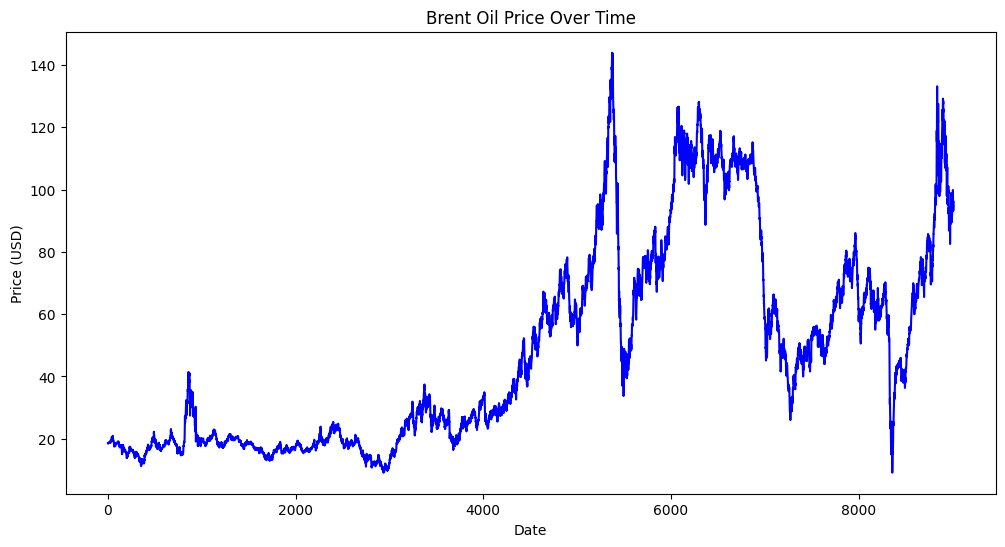

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Price'], color='blue')
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

Correlation Analysis

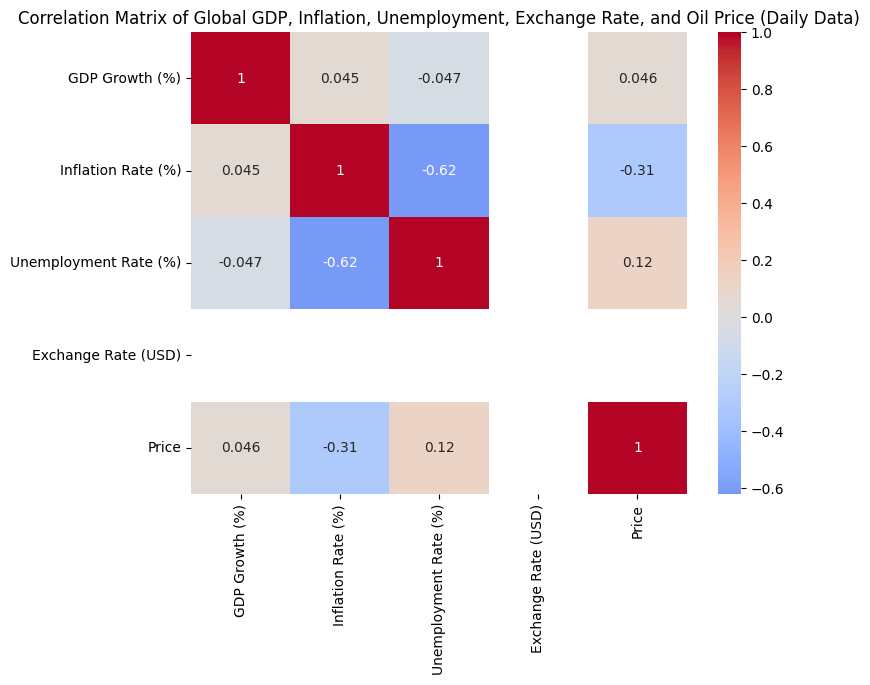

In [41]:
data_extracter.calculate_correlations()

economic indicators against oil prices

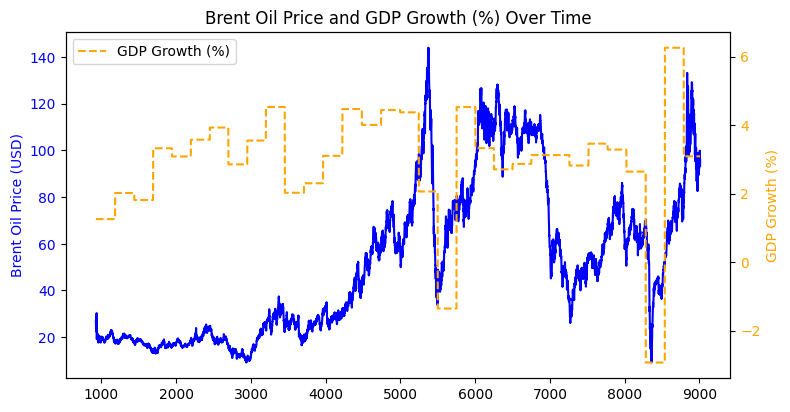

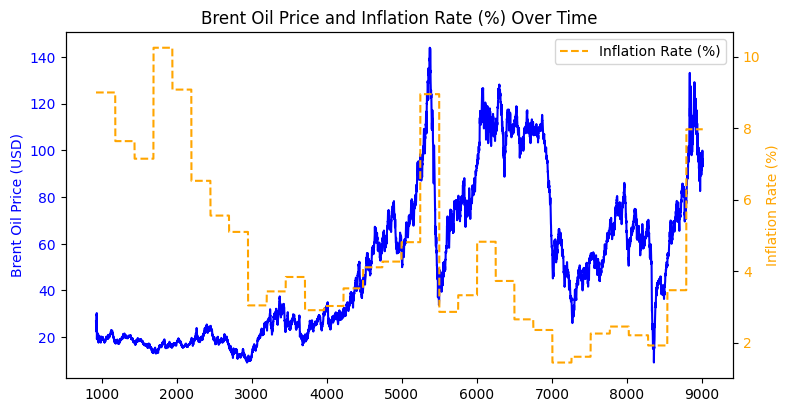

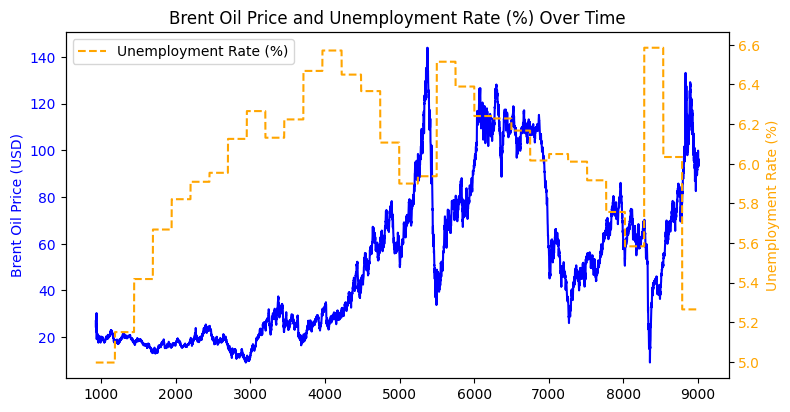

In [42]:
# plots for economic indicators against oil prices
for column in ['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)']:
    fig, ax1 = plt.subplots(figsize=(8, 4))  # Adjusted size for a smaller plot
    
    ax1.plot(data.index, data['Price'], color='blue', label='Brent Oil Price')
    ax1.set_ylabel('Brent Oil Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax2 = ax1.twinx()
    ax2.plot(data.index, data[column], color='orange', linestyle='--', label=column)
    ax2.set_ylabel(column, color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    
    fig.tight_layout()
    plt.title(f"Brent Oil Price and {column} Over Time")
    plt.legend()
    plt.show()

Time Series Modeling

In [43]:
model_builder = ModelBuilder()

Data Spliting

In [44]:
# Split data into 80% train and 20% test sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [45]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Define ADF test function
def adf_test(series):
    result = adfuller(series)
    return {'ADF Statistic': result[0], 'p-value': result[1]}

# Assuming 'data' has a DateTime index, ensure we are working with numeric columns only
stationary_data = pd.DataFrame()

# Select only numeric columns (exclude date or any non-numeric columns)
numeric_data = data.select_dtypes(include=[np.number])

for column in numeric_data.columns:
    series = numeric_data[column].dropna()  # Remove missing values before ADF test
    adf_result = adf_test(series)
    
    if adf_result['p-value'] > 0.05:
        print(f"{column} is non-stationary (p-value: {adf_result['p-value']}). Differencing applied.")
        stationary_data[column] = series.diff().dropna()  # Apply differencing if non-stationary
    else:
        print(f"{column} is stationary (p-value: {adf_result['p-value']}). No differencing applied.")
        stationary_data[column] = series  # Keep the original if stationary


GDP Growth (%) is stationary (p-value: 0.00044350495705694455). No differencing applied.
Inflation Rate (%) is non-stationary (p-value: 0.16760008947714272). Differencing applied.
Unemployment Rate (%) is non-stationary (p-value: 0.11545672194916429). Differencing applied.
Price is non-stationary (p-value: 0.2859021858697546). Differencing applied.


In [46]:
# Convert all columns to numeric (in case of any mixed types)
stationary_data = stationary_data.apply(pd.to_numeric, errors='coerce')


In [47]:

# Handle any remaining NaN values (e.g., by forward filling)
stationary_data = stationary_data.fillna(method='ffill').dropna()


C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_3736\129897472.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stationary_data = stationary_data.fillna(method='ffill').dropna()


In [48]:

# Splitting the data into train and test sets
train_size = int(0.8 * len(stationary_data))
train_data = stationary_data[:train_size]
test_data = stationary_data[train_size:]

# Ensure all columns are numeric and free from NaN in train_data
train_data = train_data.dropna()

# Fit the VAR model on the training data
model = VAR(train_data)
results = model.fit(maxlags=15, ic='aic')

# Forecasting
lag_order = results.k_ar
forecast_input = train_data.values[-lag_order:]
forecasted_values = results.forecast(y=forecast_input, steps=len(test_data))

# Convert forecasts to DataFrame for easy handling
forecast_df = pd.DataFrame(forecasted_values, index=test_data.index, columns=test_data.columns)


c:\Users\Firew Ayele\Desktop\kifiya\Birhan_Energies\.venv_birhan\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
